# 获取数据：在线获取多只股票的交易数据

提示词：

```raw{label:get_stock_data}
目的：Python代码，获取多只股票的交易资料
数据来源：你选择合适的 package，适合中国大陆用户，自动在线下载
package: tushare, akshare, baostock 等。akshare 是最常用的
股票列表：中国移动，贵州茅台，万科A，比亚迪, 宁德时代, 南方航空, 格力电器
时间范围：2014 -2024 年
频率：日线数据
数据格式：pandas dataframe
数据字段：日期，收盘价，市值，交易量，换手率。使用英文名称。
数据处理：数据清洗，去除缺失值，转换数据类型
```

In [ ]:
import akshare as ak
import pandas as pd

# 导入所需库

# 股票名称与对应代码（可查自 akshare 的股票列表）
stocks = {
    "中国移动": "600941",
    "贵州茅台": "600519",
    "万科A": "000002",
    "比亚迪": "002594",
    "宁德时代": "300750",
    "南方航空": "600029",
    "格力电器": "000651"
}

# 时间范围
start_date = "2014-01-01"
end_date = "2024-12-31"

# 初始化结果列表
data_list = []

# 遍历每只股票获取数据
for name, code in stocks.items():
    try:
        df = ak.stock_zh_a_hist( 
               symbol=code, 
               period="daily", 
               start_date=start_date.replace("-", ""), 
               end_date=end_date.replace("-", ""), 
               adjust="qfq")
        df["日期"] = pd.to_datetime(df["日期"])
        df["股票"] = name
        data_list.append(df[["日期", "股票", "收盘", "成交量"]])
    except Exception as e:
        print(f"读取失败：{name} ({code})，错误信息：{e}")

# 合并所有数据
df_stocks = pd.concat(data_list)
df_stocks.reset_index(drop=True, inplace=True)
print(df_stocks.head())

          日期    股票     收盘      成交量
0 2022-01-05  中国移动  45.12  2553654
1 2022-01-06  中国移动  45.24  1161577
2 2022-01-07  中国移动  44.86   638812
3 2022-01-10  中国移动  46.04   753269
4 2022-01-11  中国移动  45.33   347006


In [ ]:
# 导入库
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from datetime import datetime

# 设置字体，适配中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 股票名称与对应代码（可查自 akshare 的股票列表）
stocks = {
    "中国移动": "600941",
    "贵州茅台": "600519",
    "万科A": "000002",
    "比亚迪": "002594",
    "宁德时代": "300750",
    "南方航空": "600029",
    "格力电器": "000651"
}

# 设定年份
year = 2024
start_date = f"{year}-01-01"
end_date = f"{year}-12-31"

# 初始化结果列表
returns_list = []

# 遍历每只股票获取数据并计算收益率
for name, code in stocks.items():
    try:
        df = ak.stock_zh_a_hist(symbol=code, period="daily", start_date=start_date.replace("-", ""), end_date=end_date.replace("-", ""), adjust="qfq")
        df["日期"] = pd.to_datetime(df["日期"])
        df.sort_values("日期", inplace=True)
        df["收益率"] = df["收盘"].pct_change()
        df["股票"] = name
        returns_list.append(df[["日期", "收益率", "股票"]])
    except Exception as e:
        print(f"读取失败：{name} ({code})，错误信息：{e}")

# 合并所有数据
df_all = pd.concat(returns_list)
df_all.dropna(subset=["收益率"], inplace=True)


In [6]:

# 基本信息
print(f"数据范围：{df_all['日期'].min()} 至 {df_all['日期'].max()}")
print(f"股票数量：{df_all['股票'].nunique()}")
print(f"总交易日：{df_all['日期'].nunique()}")
print(f"总收益率：{df_all['收益率'].sum()}")

数据范围：2024-01-03 00:00:00 至 2024-12-31 00:00:00
股票数量：7
总交易日：241
总收益率：1.7456190106751293


分年度统计每只股票的收益率和收益率标准差，最大值和最小值。列表呈现。

In [15]:
# Group by year and stock, then calculate statistics
df_all['Year'] = df_all['日期'].dt.year
annual_stats = df_all.groupby(['Year', '股票'])['收益率'].agg(['mean', 'std', 'median', 'min', 'max']).reset_index()

# Display the result
print(annual_stats.round(4))

   Year    股票    mean     std  median     min     max
0  2024   万科A -0.0010  0.0291 -0.0032 -0.1002  0.1004
1  2024  中国移动  0.0010  0.0139 -0.0004 -0.0459  0.0519
2  2024  南方航空  0.0007  0.0174  0.0000 -0.0798  0.0634
3  2024  宁德时代  0.0028  0.0302 -0.0018 -0.1501  0.1914
4  2024  格力电器  0.0019  0.0173  0.0000 -0.0693  0.0797
5  2024   比亚迪  0.0019  0.0216 -0.0000 -0.0663  0.0848
6  2024  贵州茅台 -0.0001  0.0177 -0.0018 -0.0752  0.0945


In [16]:
# 筛选宁德时代的数据
ningde_data = df_all[df_all['股票'] == '宁德时代']

# 计算收益率为正的天数
positive_days = (ningde_data['收益率'] > 0).sum()

# 计算收益率为负的天数
negative_days = (ningde_data['收益率'] < 0).sum()

print(f"宁德时代在 2024 年收益率为正的天数: {positive_days}")
print(f"宁德时代在 2024 年收益率为负的天数: {negative_days}")

宁德时代在 2024 年收益率为正的天数: 111
宁德时代在 2024 年收益率为负的天数: 130


>提示词：

宁德时代在样本区间内的收盘价时序图；日收益率时序图



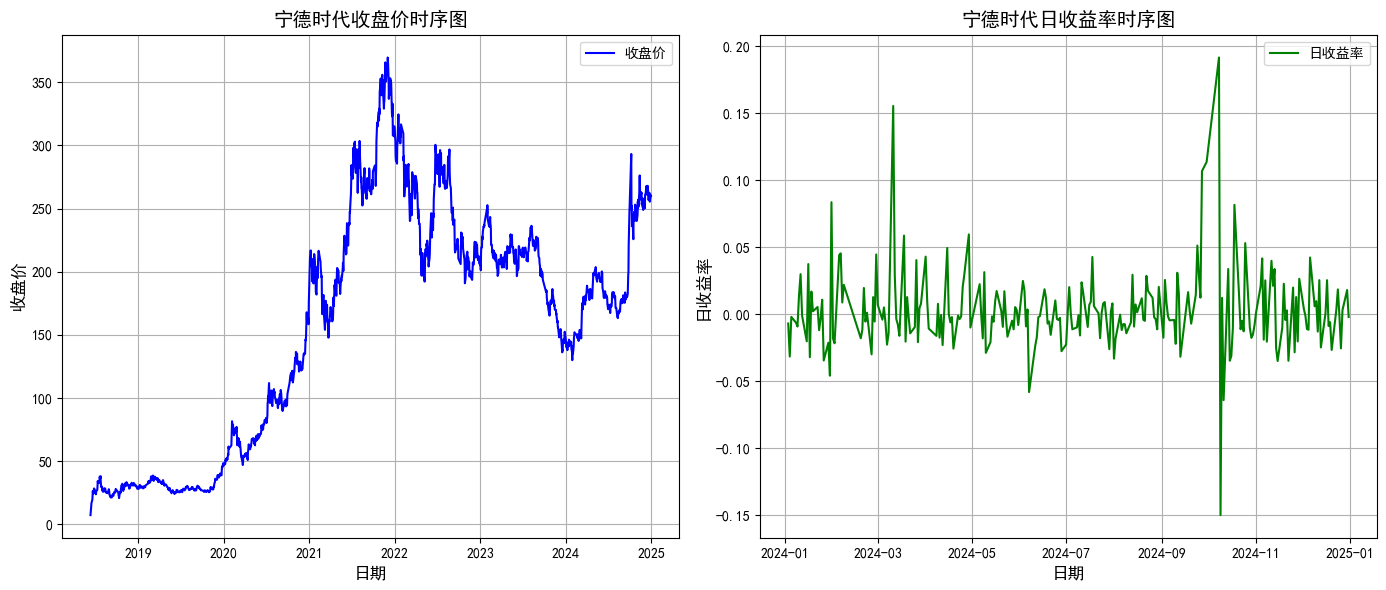

In [17]:
# 筛选宁德时代的数据
ningde_close_data = df_stocks[df_stocks['股票'] == '宁德时代']
ningde_return_data = df_all[df_all['股票'] == '宁德时代']

# 设置图形大小
plt.figure(figsize=(14, 6))

# 绘制收盘价时序图
plt.subplot(1, 2, 1)
plt.plot(ningde_close_data['日期'], ningde_close_data['收盘'], label='收盘价', color='blue')
plt.title('宁德时代收盘价时序图', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('收盘价', fontsize=12)
plt.grid(True)
plt.legend()

# 绘制日收益率时序图
plt.subplot(1, 2, 2)
plt.plot(ningde_return_data['日期'], ningde_return_data['收益率'], label='日收益率', color='green')
plt.title('宁德时代日收益率时序图', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('日收益率', fontsize=12)
plt.grid(True)
plt.legend()

# 调整布局并显示图形
plt.tight_layout()
plt.show()

> 提示词：

- 宁德时代在样本区间内的收盘价时序图；日收益率时序图。
- 两幅图合并在一个图中，使用双坐标系

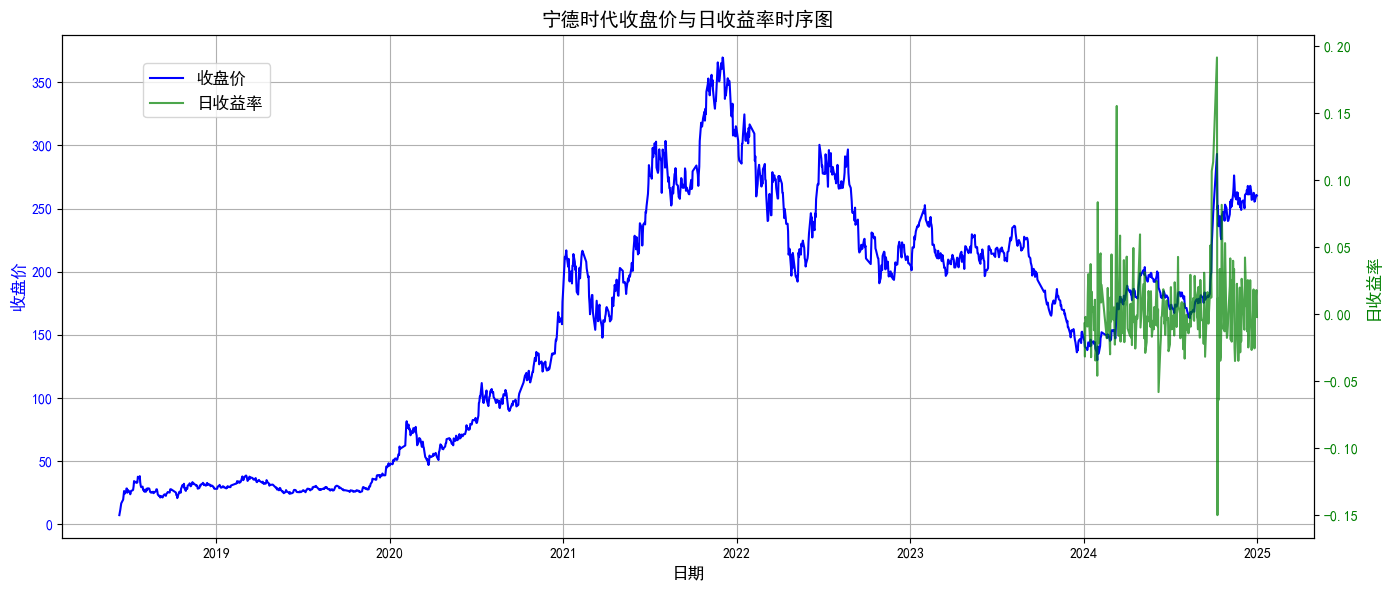

In [18]:
# 筛选宁德时代的数据
ningde_close_data = df_stocks[df_stocks['股票'] == '宁德时代']
ningde_return_data = df_all[df_all['股票'] == '宁德时代']

# 设置图形大小
fig, ax1 = plt.subplots(figsize=(14, 6))

# 绘制收盘价时序图（左轴）
ax1.plot(ningde_close_data['日期'], ningde_close_data['收盘'], label='收盘价', color='blue')
ax1.set_xlabel('日期', fontsize=12)
ax1.set_ylabel('收盘价', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('宁德时代收盘价与日收益率时序图', fontsize=14)
ax1.grid(True)

# 创建第二个 y 轴并绘制日收益率时序图
ax2 = ax1.twinx()
ax2.plot(ningde_return_data['日期'], ningde_return_data['收益率'], label='日收益率', color='green', alpha=0.7)
ax2.set_ylabel('日收益率', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 添加图例
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

# 调整布局并显示图形
plt.tight_layout()
plt.show()

## 相关系数

提示词：

```raw
年份：2014,2019,2024
目的：Python代码，计算多只股票的相关系数
```



## 相关系数热图

In [ ]:
# 使用 seaborn 绘制山脊图
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(df_all, row="股票", hue="股票", aspect=4, height=1.2, palette="viridis")
g.map(sns.kdeplot, "收益率", fill=True, alpha=0.7, linewidth=1.2)
g.map(plt.axhline, y=0, lw=1, clip_on=False)
g.set_titles(row_template="{row_name}")
g.set_xlabels("日收益率")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.suptitle(f"{year} 年多只股票的日收益率山脊图", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
